In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import  WordCloud

In [2]:
data = pd.read_csv('netflix1.csv',lineterminator='\n')

`Treating Null Values `

In this dataset we do not have null values

1 - Drop rows with null values (if data is not important)
df_cleaned = df.dropna()

2 - Drop columns with many nulls
df = df.drop(columns=['director']) # If Most values are null

3 - Fill nulls with specific values (Most Important)
3.1 - df['director'].fillna('Unknown',inplace=True)
3.2 - df['country'].fillna(df['country'].mode()[0],inplace=True)

In [3]:
## Verifying if there is any null values.
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in\r     0
dtype: int64


`Treating duplicate values`

Check for duplicates - # Shows how many duplicate rows exist
print(df.duplicated().sum())

View duplciate rows - # View all duplicate rows
df[df.duplicated()]

Remove duplicate rows and keep the first occurrence
df.drop_duplicates(inplace=True)

Remove duplicate rows and keep the Last occurrence
df.drop_duplicates(keep='last', inplace=True)


In [4]:
# Shows how many duplicate rows exist
print(data.duplicated().sum())


0


`Drop unneeded columns
`

Check the list of all columns:
print(df.columns)

Drop Columns
df.drop(columns=['director', 'day_added', 'show_id'], inplace=True)

Drop Columns Based on Condition (e.g., too many nulls)
Drop columns with more than 50% nulls
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold, inplace=True)

In [5]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in\r'],
      dtype='object')


In [6]:
## Removing unneeded columns
data.drop(columns=['show_id',"duration"],inplace=True)

`Renaming Columns `

df.rename(columns={"listed_in":"Genre","date_added":"Release_month"})

Lowercase all column names
df.columns = df.columns.str.lower()

Replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')



In [7]:
## Removing tailing and leading space from all columns
data.columns = data.columns.str.strip()

In [8]:
## Renaming columns 
data.rename(columns={'Listed_in':'Genre','Date_added':'Release_month'},inplace=True)

In [9]:
data.head()

,type,title,director,country,date_added,release_year,rating,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,Documentaries\r
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries\r"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,"Children & Family Movies, Comedies\r"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,"Dramas, Independent Movies, International Movi..."


In [10]:
# Capitaling 1st letter 
data.columns = [col.capitalize() for col in data.columns]

In [11]:
data['Genre'] = data['Genre'].str.replace(r'\r', '', regex=True).str.strip()

KeyError: 'Genre'

In [ ]:
## Shape of Database 
print("Shape Of Database:",data.shape)

Shape Of Database: (8790, 8)


In [ ]:
## General Information About Data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           8790 non-null   object
 1   Title          8790 non-null   object
 2   Director       8790 non-null   object
 3   Country        8790 non-null   object
 4   Release_month  8790 non-null   object
 5   Release_year   8790 non-null   int64 
 6   Rating         8790 non-null   object
 7   Genre          8790 non-null   object
dtypes: int64(1), object(7)
memory usage: 549.5+ KB
None


In [ ]:
## Converting date in Month
data['Release_month'] = pd.to_datetime(data['Release_month'], errors='coerce').dt.month

C:\Users\iambh\AppData\Local\Temp\ipykernel_12096\2254760702.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index,y=type_counts.values,palette="muted")


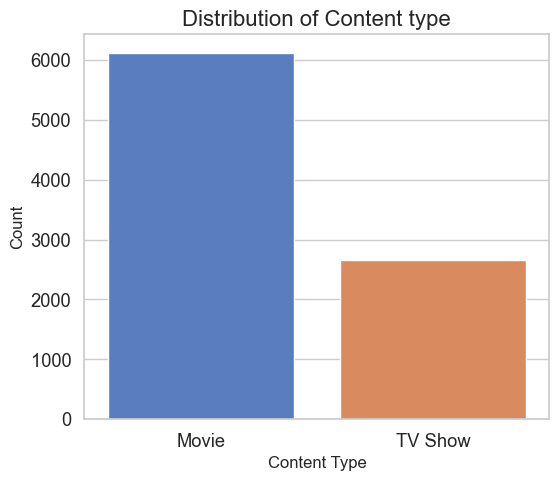

In [ ]:
## Exploratory Data Analysis
## Content Type Distribution (Movies vs TV Shows)

type_counts = data['Type'].value_counts()

plt.figure(figsize=(6,5))
sns.barplot(x=type_counts.index,y=type_counts.values,palette="muted")

plt.title('Distribution of Content type', fontsize=16)
plt.xlabel('Content Type',fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

C:\Users\iambh\AppData\Local\Temp\ipykernel_12096\59752223.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='Set3')


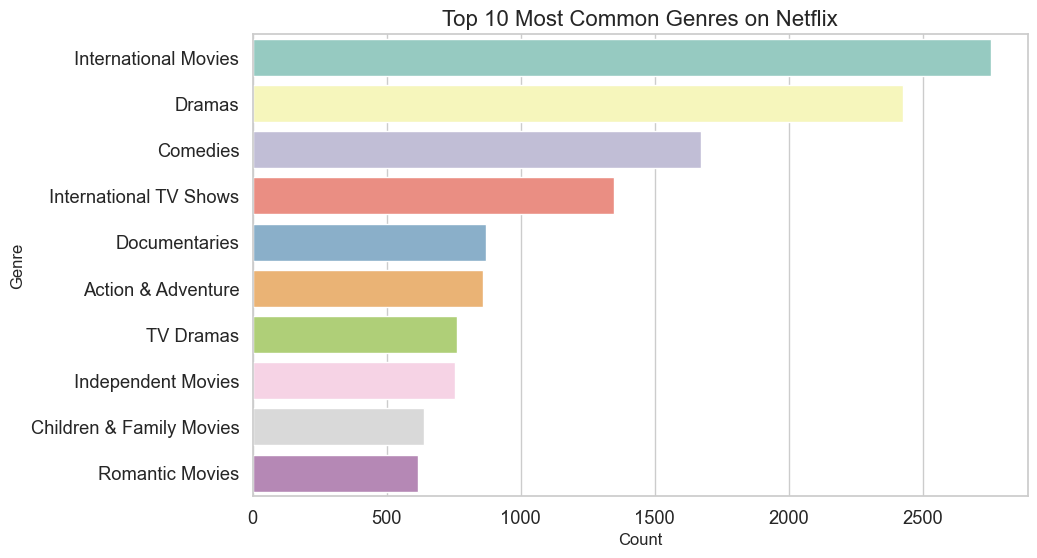

In [ ]:
# Let's first split the genres
data["Genre"] = data["Genre"].apply(lambda x: x.split(', ') if isinstance(x, str) else x)

# Now combine all genres into one list
all_genre = sum(data['Genre'], [])

# Count the frequency of each genre
genre_count = pd.Series(all_genre).value_counts().head(10)

# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='Set3')

plt.title('Top 10 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


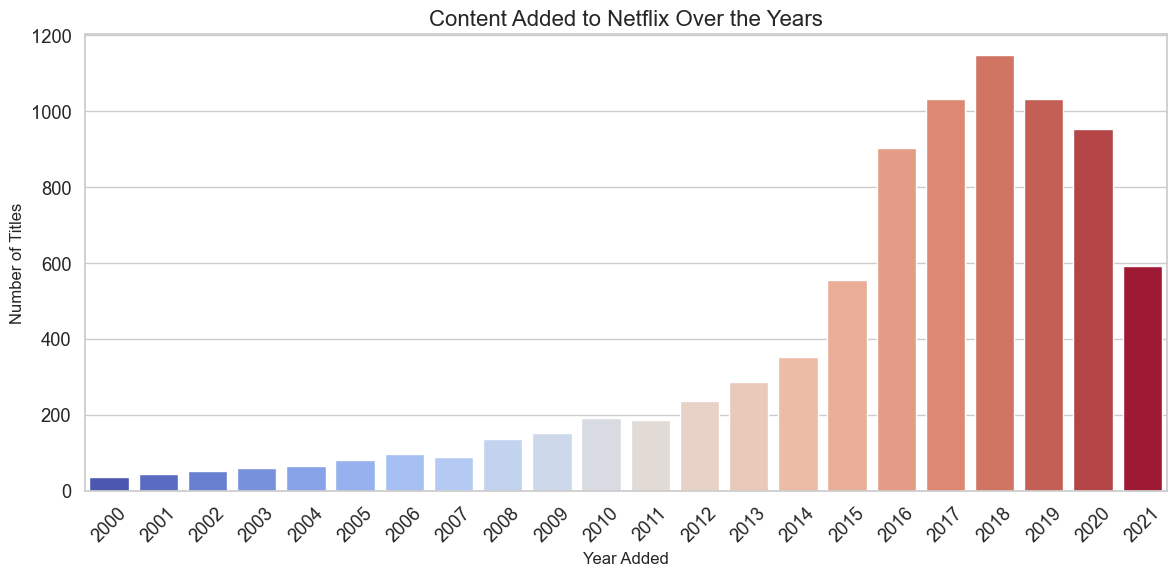

In [ ]:
# Filter the data to include only the years between 2000 and 2021
filtered_data = data[(data['Release_year'] >= 2000) & (data['Release_year'] <= 2021)]

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='Release_year', data=filtered_data, hue='Release_year', palette='coolwarm', legend=False)

plt.title("Content Added to Netflix Over the Years", fontsize=16)
plt.xlabel("Year Added", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\iambh\AppData\Local\Temp\ipykernel_12096\4167578902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Release_month',data=data,palette='viridis')


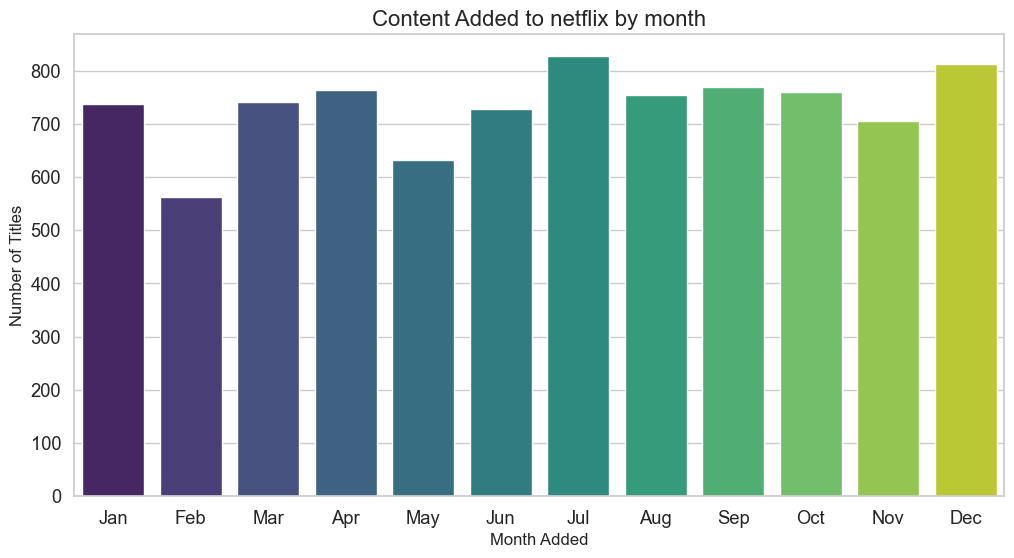

In [ ]:
# Content Added over Time (Monthly)
plt.figure(figsize=(12,6))
sns.countplot(x='Release_month',data=data,palette='viridis')

plt.title("Content Added to netflix by month",fontsize=16)
plt.xlabel("Month Added",fontsize=12)
plt.ylabel("Number of Titles",fontsize=12)
plt.xticks(ticks=range(0,12),labels=['Jan',"Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

C:\Users\iambh\AppData\Local\Temp\ipykernel_12096\1818580753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values,y=top_directors.index,palette='Blues_d')


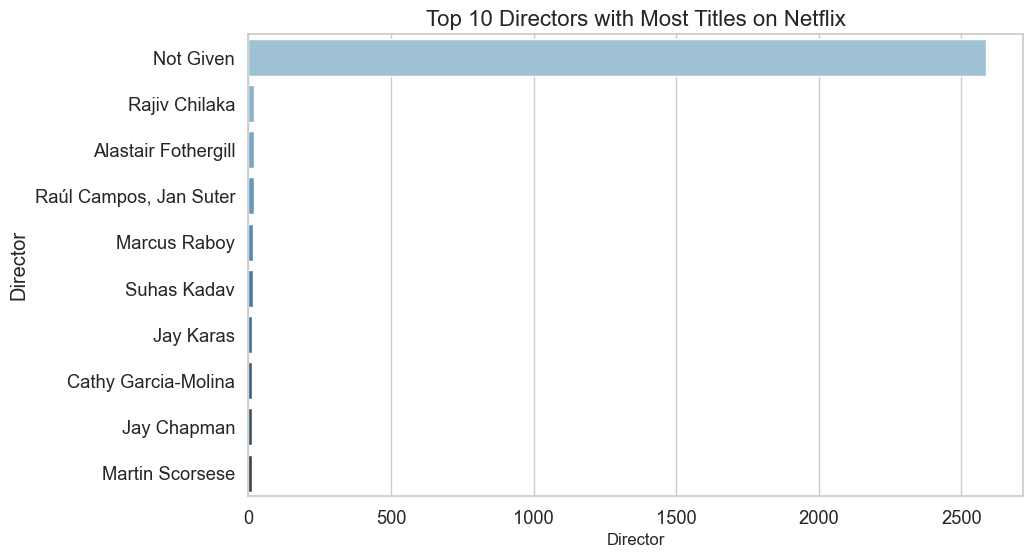

In [ ]:
## Top 10 Directors with most titles
top_directors = data['Director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values,y=top_directors.index,palette='Blues_d')

plt.title("Top 10 Directors with Most Titles on Netflix",fontsize=16)
plt.xlabel('Number of Titles',fontsize=12)
plt.xlabel("Director",fontsize=12)
plt.show()

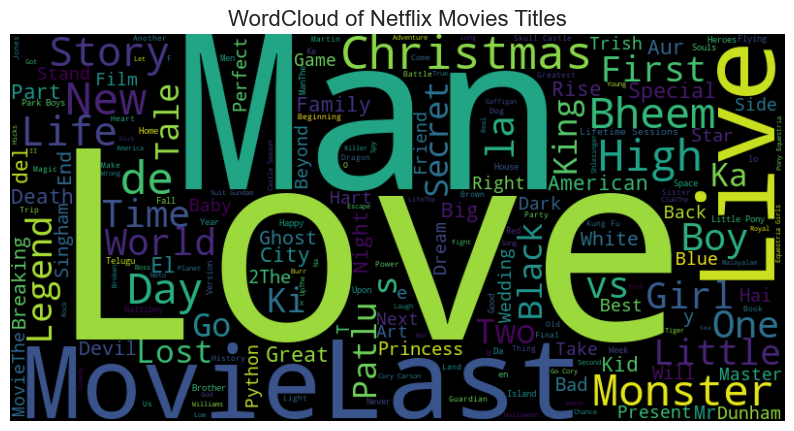

In [ ]:
## WordCloud of Movies Titles
movie_titles = data[data["Type"]== "Movie"]["Title"]

## Creating WordCloud

wordcloud=WordCloud(width=800,height=400,background_color='black').generate(''.join(movie_titles))

## Plot The WordCloud

plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Netflix Movies Titles',fontsize=16)
plt.show()

In [ ]:
data.head()

,Type,Title,Director,Country,Release_month,Release_year,Rating,Genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9,2020,PG-13,[Documentaries]
1,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9,2021,TV-MA,"[TV Dramas, TV Horror, TV Mysteries]"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9,2021,TV-PG,"[Children & Family Movies, Comedies]"
4,Movie,Sankofa,Haile Gerima,United States,9,1993,TV-MA,"[Dramas, Independent Movies, International Mov..."


In [ ]:
# Convert all values in the Genre column to strings (just in case they are lists)
data['Genre'] = data['Genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['Genre'].fillna(''))

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Get recommendations for a specific Title (e.g., 'Inception')
def get_recommendations(title):
    idx = data[data['Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    return data['Title'].iloc[[i[0] for i in sim_scores]]

# Example usage
print(get_recommendations("Inception"))


184          Chappie
205    Green Lantern
466          Beowulf
729    Mortal Kombat
742        Star Trek
Name: Title, dtype: object


In [26]:
import plotly.express as px

year_counts = data['Release_year'].value_counts().sort_index()
fig = px.bar(x=year_counts.index, y=year_counts.values,
             labels={'x':'Release Year', 'y':'Number of Titles'},
             title="Titles Released on Netflix Each Year")
fig.show()


In [ ]:
## > Jupyter: Restart Kernel and Run All CellsCells


C:\Users\iambh\AppData\Local\Temp\ipykernel_17756\3426433376.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




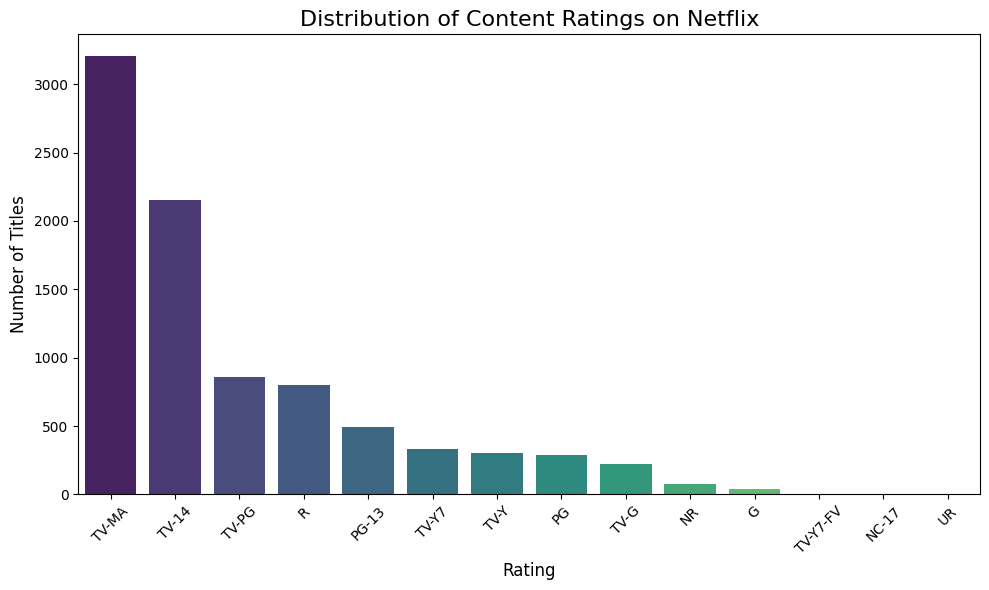

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many titles fall under each rating
rating_counts = data['Rating'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

plt.title("Distribution of Content Ratings on Netflix", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\iambh\AppData\Local\Temp\ipykernel_17756\2741379848.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




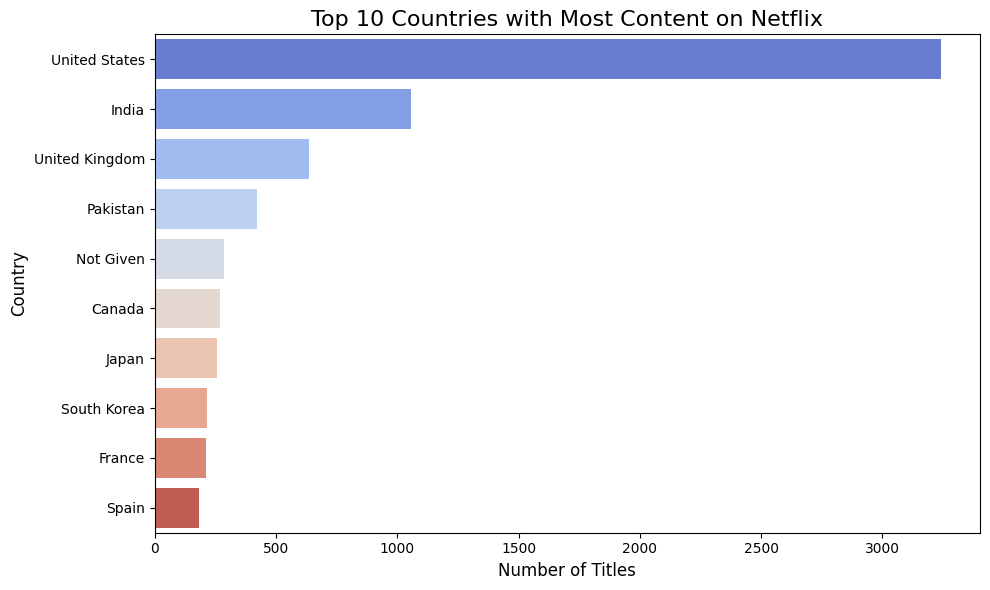

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'Not Given' or NaNs with an empty string for split
data['Country'] = data['Country'].fillna('')

# Split multiple countries per title and explode them into separate rows
countries_split = data['Country'].str.split(', ')
countries_exploded = data.assign(Country=countries_split).explode('Country')

# Count top 10 countries
top_countries = countries_exploded['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')

plt.title("Top 10 Countries with Most Content on Netflix", fontsize=16)
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()


In [31]:
# Count number of Movies and TV Shows per year
yearly_type_counts = data.groupby(['Release_year', 'Type']).size().unstack(fill_value=0)


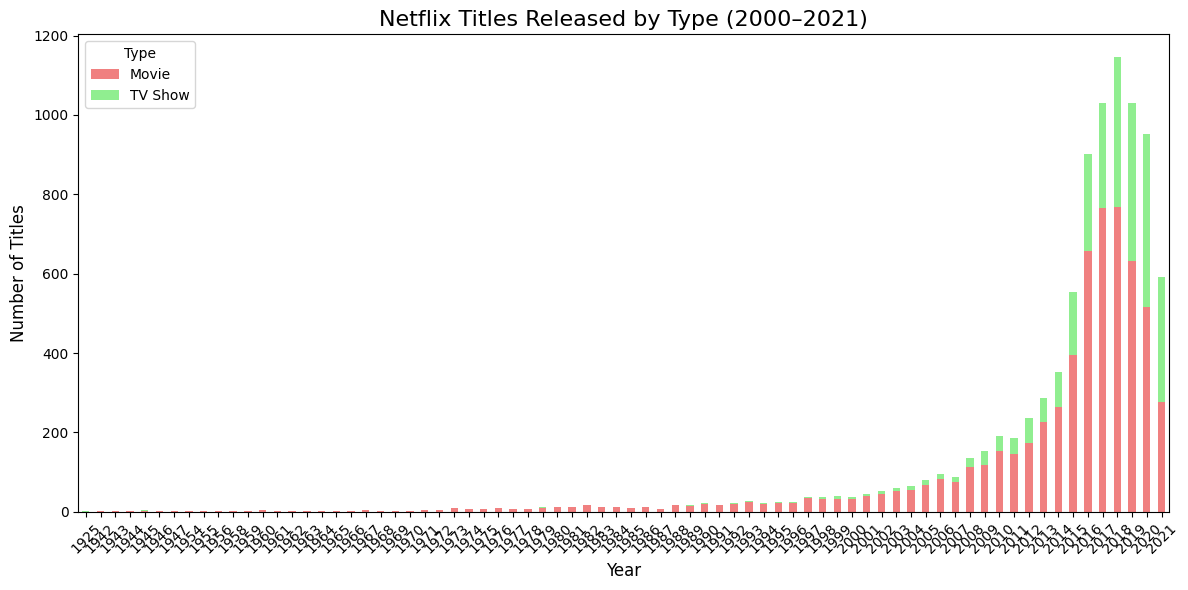

In [33]:
import matplotlib.pyplot as plt

yearly_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightcoral', 'lightgreen'])
plt.title('Netflix Titles Released by Type (2000–2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


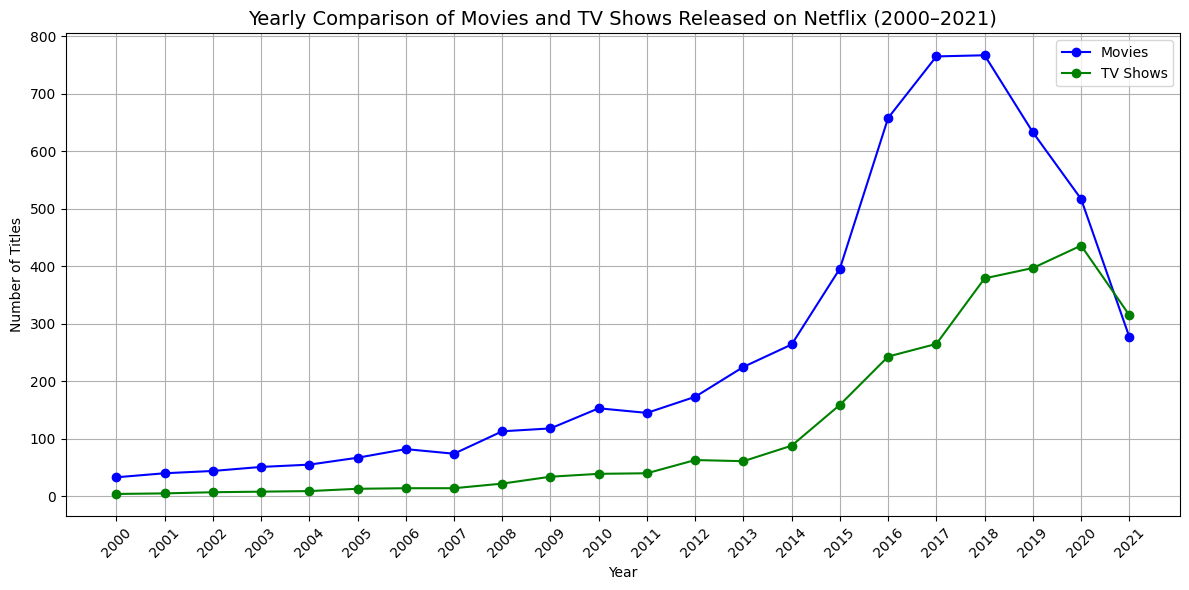

In [34]:
data['Release_year'] = pd.to_numeric(data['Release_year'], errors='coerce')
filtered_data = data[(data['Release_year'] >= 2000) & (data['Release_year'] <= 2021)]
year_type_counts = filtered_data.groupby(['Release_year', 'Type']).size().unstack(fill_value=0)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(year_type_counts.index, year_type_counts['Movie'], marker='o', label='Movies', color='blue')
plt.plot(year_type_counts.index, year_type_counts['TV Show'], marker='o', label='TV Shows', color='green')

plt.title('Yearly Comparison of Movies and TV Shows Released on Netflix (2000–2021)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(year_type_counts.index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


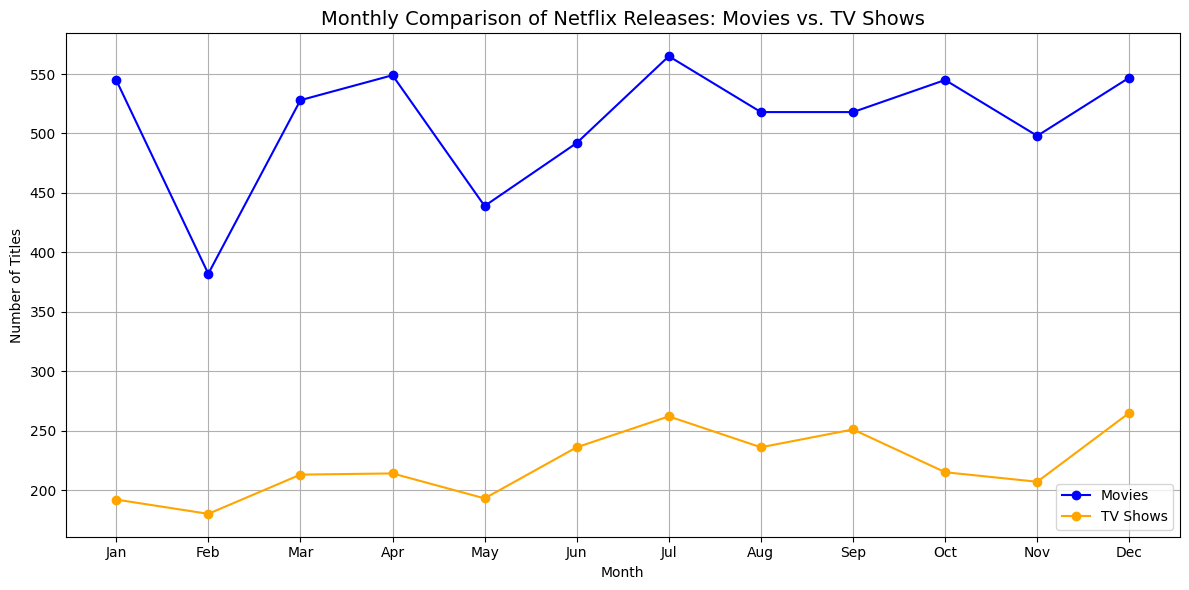

In [35]:
data['Month'] = pd.to_datetime(data['Date_added'], errors='coerce').dt.month
monthly_type_counts = data.groupby(['Month', 'Type']).size().unstack(fill_value=0)
monthly_type_counts = monthly_type_counts.sort_index()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_type_counts.index, monthly_type_counts['Movie'], marker='o', label='Movies', color='blue')
plt.plot(monthly_type_counts.index, monthly_type_counts['TV Show'], marker='o', label='TV Shows', color='orange')

plt.title('Monthly Comparison of Netflix Releases: Movies vs. TV Shows', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
data.shape

(8790, 9)

In [38]:
data.head()

,Type,Title,Director,Country,Date_added,Release_year,Rating,Listed_in,Month
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,Documentaries\r,9
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",9
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries\r",9
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,"Children & Family Movies, Comedies\r",9
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,"Dramas, Independent Movies, International Movi...",9
